# AirBnB Project

1) Calculate How many properties in each neighbourhood group

2) Which Neighbour Hood Group Has highest prices use bar chart to show this for all neighbourhood groups

3) Which Neighbourhood group has lowest prices use bar chart to show this for all neighbourhood groups

4) Highest and lowest price airbnb in each Neighbour Hood Group

5) Which Host has highest count of properties

6) Which neighbourhood is most expensive and cheapest top 10 barchart

7) Count different type of room_type and do a pie chart showing % of each room type in overall dataset

8) scatter plot between longitutude and latitude for different neighbourhood groups

9) scatter plot between longitutude and latitude for different room_types

10) room_type vs price bar chart for the mean and highest and lowest

11) Do a similar plot to this

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
path = '/content/AB_NYC_2019.csv'
df = pd.read_csv(path)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [47]:
df.shape

(48895, 16)

In [48]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

1) Calculate How many properties in each neighbourhood group

In [49]:
#1) Calculate How many properties in each neighbourhood group

df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

neighbourhood_group
Brooklyn         10000
Manhattan        10000
Queens           10000
Staten Island     5000
Bronx             2500
Name: price, dtype: int64
The neighborhood group with the highest price is  with a price of $10000


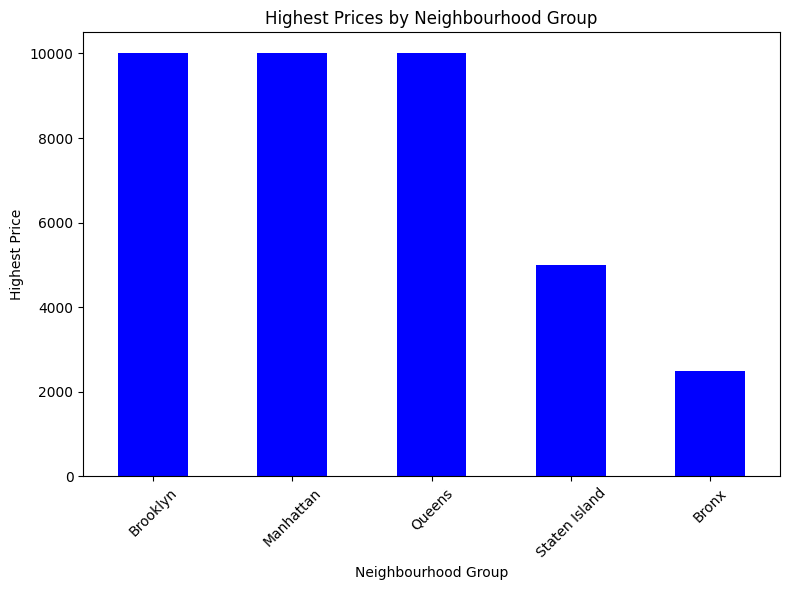

In [50]:
# 2) Which Neighbour Hood Group Has highest prices use bar chart to show this for all neighbourhood groups

highest_prices = df.groupby('neighbourhood_group')['price'].max()
ng_highest_prices = highest_prices.sort_values(ascending=False)
print(ng_highest_prices)
print(f'The neighborhood group with the highest price is  with a price of ${ng_highest_prices.iloc[0]}')

plt.figure(figsize=(8, 6))
ng_highest_prices.plot(kind='bar', color='blue')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Highest Price')
plt.title('Highest Prices by Neighbourhood Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

neighbourhood_group
Bronx             0
Brooklyn          0
Manhattan         0
Queens           10
Staten Island    13
Name: price, dtype: int64
The neighborhood group with the highest price is  with a price of $0


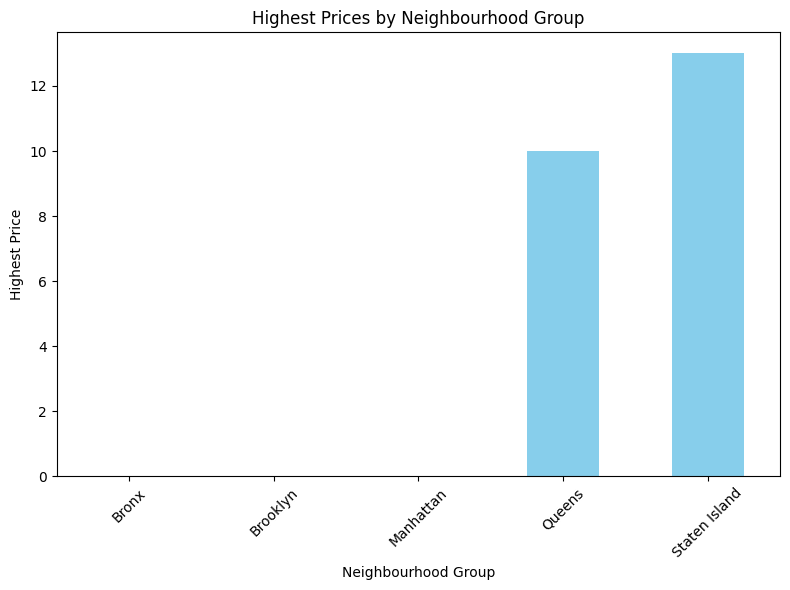

In [51]:
# 3) Which Neighbourhood group has lowest prices use bar chart to show this for all neighbourhood groups

lowest_prices = df.groupby('neighbourhood_group')['price'].min()
ng_lowest_prices = lowest_prices.sort_values(ascending=True)
print(ng_lowest_prices)
print(f'The neighborhood group with the highest price is  with a price of ${ng_lowest_prices.iloc[0]}')

plt.figure(figsize=(8, 6))
ng_lowest_prices.plot(kind='bar', color='skyblue')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Highest Price')
plt.title('Highest Prices by Neighbourhood Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

4) Highest and lowest price airbnb in each Neighbour Hood Group

In [52]:
# 4) Highest and lowest price airbnb in each Neighbour Hood Group

highest = df.groupby('neighbourhood_group')['price'].max()
highest_price = highest.sort_values(ascending=False)
highest_price_airbnb = highest_price.iloc[0]
print('The Highest price airbnb neighbourhood group is:', highest_price_airbnb)

lowest = df.groupby('neighbourhood_group')['price'].min()
lowest_price = lowest.sort_values(ascending=True)
lowest_price_airbnb = lowest_price.iloc[0]
print('The Lowest price airbnb neighbourhood group is:', lowest_price_airbnb)


The Highest price airbnb neighbourhood group is: 10000
The Lowest price airbnb neighbourhood group is: 0


5) Which Host has highest count of properties

In [53]:
# 5) Which Host has highest count of properties

host_property_counts = df['host_name'].value_counts()

highest_property_count_host = host_property_counts.idxmax()
highest_property_count = host_property_counts.max()

print(f"The host with the highest count of properties is host {highest_property_count_host} with {highest_property_count} properties.")


The host with the highest count of properties is host Michael with 417 properties.


6) Which neighbourhood is most expensive and cheapest top 10 barchart

Top 10 expensive neighbourhoods:
 neighbourhood
Upper West Side      10000
Greenpoint           10000
Astoria              10000
Lower East Side       9999
East Harlem           9999
Tribeca               8500
Clinton Hill          8000
Upper East Side       7703
Battery Park City     7500
East Flatbush         7500
Name: price, dtype: int64
--------------------------------
Top 10 cheapest neighbourhoods:
 neighbourhood
Fort Wadsworth     800
Woodrow            700
Willowbrook        249
Neponsit           200
Breezy Point       195
Lighthouse Hill    115
Howland Hook       100
Grymes Hill         89
Mill Basin          85
Belle Harbor        85
Name: price, dtype: int64


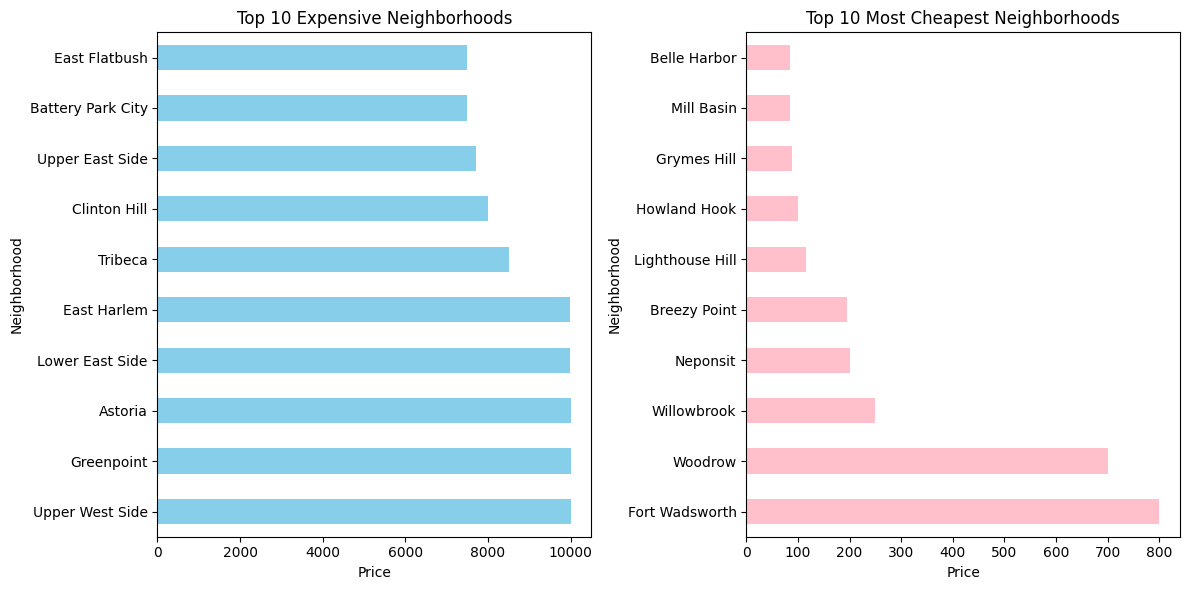

In [54]:
# 6) Which neighbourhood is most expensive and cheapest top 10 barchart

neighbourhood_prices = df.groupby('neighbourhood')['price']

top_10_expensive = neighbourhood_prices.max().sort_values(ascending=False).head(10)

top_10_cheapest =  neighbourhood_prices.min().sort_values(ascending=False).head(10)

print('Top 10 expensive neighbourhoods:\n', top_10_expensive)
print('--------------------------------')
print('Top 10 cheapest neighbourhoods:\n', top_10_cheapest)

# Bar chart

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
top_10_expensive.plot(kind='barh', color='skyblue')
plt.xlabel('Price')
plt.ylabel('Neighborhood')
plt.title('Top 10 Expensive Neighborhoods')

plt.subplot(1, 2, 2)
top_10_cheapest.plot(kind='barh', color='pink')
plt.xlabel('Price')
plt.ylabel('Neighborhood')
plt.title('Top 10 Most Cheapest Neighborhoods')

plt.tight_layout()
plt.show()



7) Count different type of room_type and do a pie chart showing % of each room type in overall dataset

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64


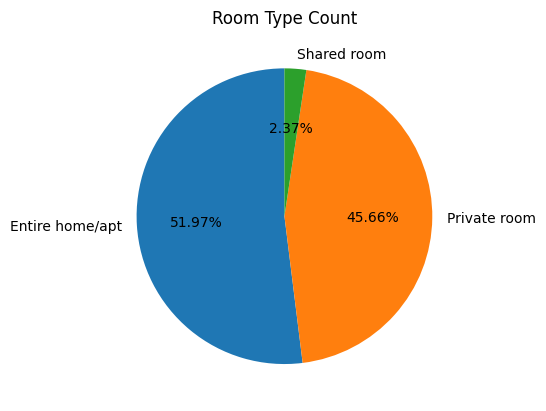

In [55]:
# 7) Count different type of room_type and do a pie chart showing % of each room type in overall dataset

room_type_count = df['room_type'].value_counts()
print(room_type_count)

plt.pie(room_type_count, labels=room_type_count.index, startangle = 90, autopct='%1.2f%%')
plt.title('Room Type Count')
plt.show()

8) scatter plot between longitutude and latitude for different neighbourhood groups

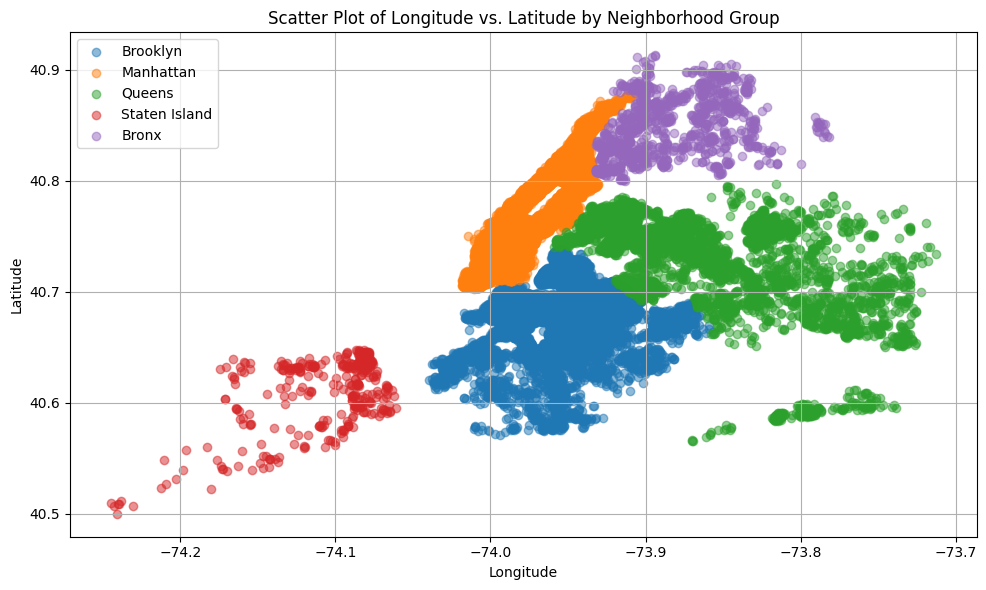

In [56]:
# 8) scatter plot between longitutude and latitude for different neighbourhood groups

neighborhood_groups = df['neighbourhood_group'].unique()

plt.figure(figsize=(10, 6))

# Loop through each neighborhood group and create a scatter plot
for group in neighborhood_groups:
    group_df = df[df['neighbourhood_group'] == group]
    plt.scatter(group_df['longitude'], group_df['latitude'], label=group, alpha=0.5)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Longitude vs. Latitude by Neighborhood Group')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



9) scatter plot between longitutude and latitude for different room_types

['Private room' 'Entire home/apt' 'Shared room']


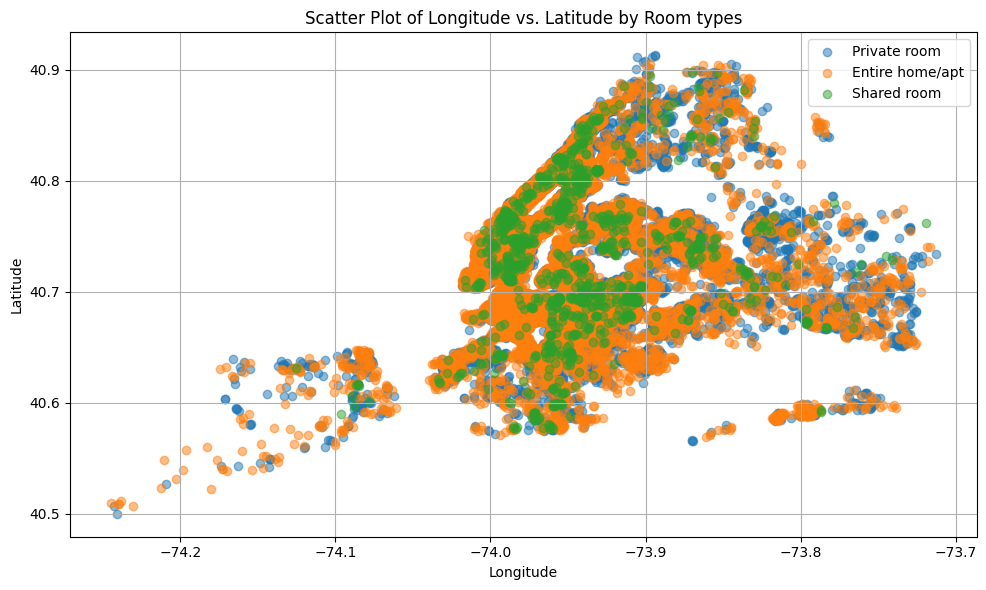

In [57]:
# 9) scatter plot between longitutude and latitude for different room_types

room_types = df['room_type'].unique()
print(room_types)

plt.figure(figsize=(10, 6))

# Loop through each room type and create a scatter plot
for room in room_types:
    room_type_df = df[df['room_type'] == room]
    plt.scatter(room_type_df['longitude'], room_type_df['latitude'], label=room, alpha=0.5)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Longitude vs. Latitude by Room types')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

10) room_type vs price bar chart for the mean and highest and lowest

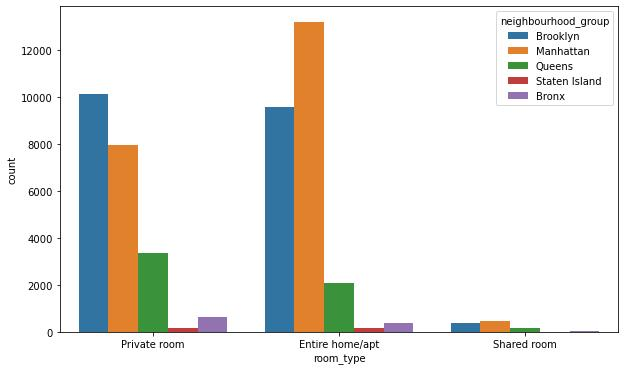

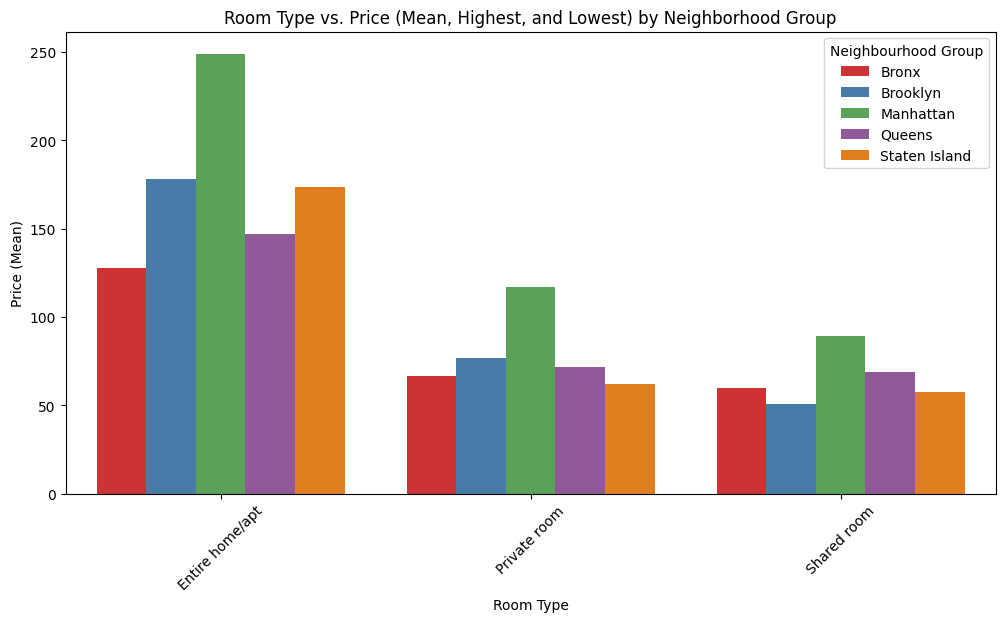

In [58]:
# 10) room_type vs price bar chart for the mean and highest and lowest

# Calculate mean, highest, and lowest prices for each room type in each neighborhood group
room_price_stats = df.groupby(['neighbourhood_group', 'room_type'])['price'].agg(['mean', 'max', 'min']).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=room_price_stats, x='room_type', y='mean', hue='neighbourhood_group', palette='Set1')
plt.title('Room Type vs. Price (Mean, Highest, and Lowest) by Neighborhood Group')
plt.xlabel('Room Type')
plt.ylabel('Price (Mean)')
plt.xticks(rotation=45)
plt.legend(title='Neighbourhood Group')

plt.show()





Price prediction with all regression models linear regression,polynomial,SVR,Random Regressor, Decison Tree Regressor



Columns to use neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count

reviews_per_month have a lot of nan values (10052). We can't drop all of them. So we approach this in 2 ways:
first method  is to fill the null cells with zero

second method check if the same host id has other properties with reviews_per_month. Take mean only if num_of_reviews is greater than 0 and fill nans - if not then fill with zero



 1 lak nan values in reviews_per_month

 first check if num_of_reviews>0 if no fill with zero else find the host_id. Find all properties of this host and do mean of reviews_per_month to fill the nan value

In [59]:
df['host_name'].isnull().sum()

21

In [60]:
df['host_id'].isnull().sum()

0

# Find missing host name ids and fill the values with host name from other rows

In [61]:
#find missing host name ids and fill the values with host name from other rows

# Find the IDs of missing host names
missing_host_ids = df[df['host_name'].isnull()]['host_id'].unique()
print('Host IDs of missing host names:\n', missing_host_ids)
print()


# dictionary to map host_ids to host_names
host_id_to_name = df.groupby('host_id')['host_name'].first().to_dict()

# Iterate through each missing host_id and fill in the missing host_name
for host_id in missing_host_ids:
    missing_host_name = host_id_to_name.get(host_id)
    if missing_host_name:
        # Update the host_name in the original DataFrame
        df.loc[df['host_id'] == host_id, 'host_name'] = missing_host_name
        print(missing_host_name)

# Verifying if the missing host names have been filled
print(df[df['host_name'].isnull()])



Host IDs of missing host names:
 [   526653   7779204    919218  23077718  24576978  32722063  33134899
   5162530  39608626   7822683  26138712   5300585 100971588    415290
 159156636 177146433 119609345 228750026]

             id                                               name    host_id  \
360      100184                                          Bienvenue     526653   
2700    1449546                            Cozy Studio in Flatbush    7779204   
5745    4183989    SPRING in the City!! Zen-Style Tranquil Bedroom     919218   
6075    4446862                 Charming Room in Prospect Heights!   23077718   
6582    4763327                Luxurious, best location, spa inc'l   24576978   
8163    6292866                          Modern Quiet Gem Near All   32722063   
8257    6360224                    Sunny, Private room in Bushwick   33134899   
8852    6786181                       R&S Modern Spacious Hideaway   32722063   
9138    6992973                    1 Bedroom in Prime

In [62]:
# Verifying that all missing host_names have been filled
print("Number of missing host names after filling:", df['host_name'].isnull().sum())

Number of missing host names after filling: 21


# The 21 nan values couldn't be filled because the corresponding host_names are null in any other rows/listing as well.

In [63]:
df.iloc[360, 3]

nan

# reviews_per_month has a lot of nan values (10052). We can't drop all of them. So we approach this in 2 ways:
1. Fill the null cells with zero
2. Check if the same host id has other properties with reviews_per_month. Take mean only if num_of_reviews is greater than 0 and fill nans - if not then fill with zero

Check if num_of_reviews>0.

If it is not: fill with zero

Else: find the host_id.

Find all properties of this host and caluclate mean of reviews_per_month to fill the nan values

In [64]:
# Fill NaN values in 'reviews_per_month'
def fill_reviews_per_month(row):
    if row['number_of_reviews'] > 0:
        host_id = row['host_id']
        mean_reviews = df[df['host_id'] == host_id]['reviews_per_month'].mean()
        return mean_reviews
    else:
        return 0

# Apply the function to fill NaN values in 'reviews_per_month'
df['reviews_per_month'] = df.apply(fill_reviews_per_month, axis=1)

# Verifying
print(df['reviews_per_month'].isna().sum())


0



# Price prediction with all regression models:
1. linear regression
2. polynomial
3. SVR
4. Random Regressor
5. Decison Tree Regressor

Columns to use:
1. neighbourhood_group
2. latitude
3. longitude
4. room_type
5. minimum_nights
6. number_of_reviews
7. reviews_per_month
8. calculated_host_listings_count

In [118]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures

In [119]:
selected_columns = ['neighbourhood_group', 'latitude', 'longitude', 'room_type',
                    'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'price']

# new DataFrame with selected columns
data = df[selected_columns]

In [120]:
from sklearn.preprocessing import OneHotEncoder
# Perform one-hot encoding for 'neighbourhood_group' and 'room_type'
data2 = pd.get_dummies(data, columns=['neighbourhood_group', 'room_type'])

# Display the updated DataFrame with one-hot encoding
print(data2)

       latitude  longitude  minimum_nights  number_of_reviews  \
0      40.64749  -73.97237               1                  9   
1      40.75362  -73.98377               1                 45   
2      40.80902  -73.94190               3                  0   
3      40.68514  -73.95976               1                270   
4      40.79851  -73.94399              10                  9   
...         ...        ...             ...                ...   
48890  40.67853  -73.94995               2                  0   
48891  40.70184  -73.93317               4                  0   
48892  40.81475  -73.94867              10                  0   
48893  40.75751  -73.99112               1                  0   
48894  40.76404  -73.98933               7                  0   

       reviews_per_month  calculated_host_listings_count  price  \
0                   0.48                               6    149   
1                   0.23                               2    225   
2                 

In [113]:
data2

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,price,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,1,9,0.48,6,149,0,1,0,0,0,0,1,0
1,40.75362,-73.98377,1,45,0.23,2,225,0,0,1,0,0,1,0,0
2,40.80902,-73.94190,3,0,0.00,1,150,0,0,1,0,0,0,1,0
3,40.68514,-73.95976,1,270,4.64,1,89,0,1,0,0,0,1,0,0
4,40.79851,-73.94399,10,9,0.10,1,80,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,2,0,0.00,2,70,0,1,0,0,0,0,1,0
48891,40.70184,-73.93317,4,0,0.00,2,40,0,1,0,0,0,0,1,0
48892,40.81475,-73.94867,10,0,0.00,1,115,0,0,1,0,0,1,0,0
48893,40.75751,-73.99112,1,0,0.00,6,55,0,0,1,0,0,0,0,1


In [82]:
# Splitting data into features (X) and target (y)
X = data2.drop('price', axis=1)
y = data2['price']

from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
X

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,1,9,0.48,6,0,1,0,0,0,0,1,0
1,40.75362,-73.98377,1,45,0.23,2,0,0,1,0,0,1,0,0
2,40.80902,-73.94190,3,0,0.00,1,0,0,1,0,0,0,1,0
3,40.68514,-73.95976,1,270,4.64,1,0,1,0,0,0,1,0,0
4,40.79851,-73.94399,10,9,0.10,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,2,0,0.00,2,0,1,0,0,0,0,1,0
48891,40.70184,-73.93317,4,0,0.00,2,0,1,0,0,0,0,1,0
48892,40.81475,-73.94867,10,0,0.00,1,0,0,1,0,0,1,0,0
48893,40.75751,-73.99112,1,0,0.00,6,0,0,1,0,0,0,0,1


In [88]:
y

0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 48895, dtype: int64

# Linear Regression

In [84]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# Linear Regression
reg_lr = LinearRegression()
reg_lr.fit(X_train, y_train)

LinearRegression()

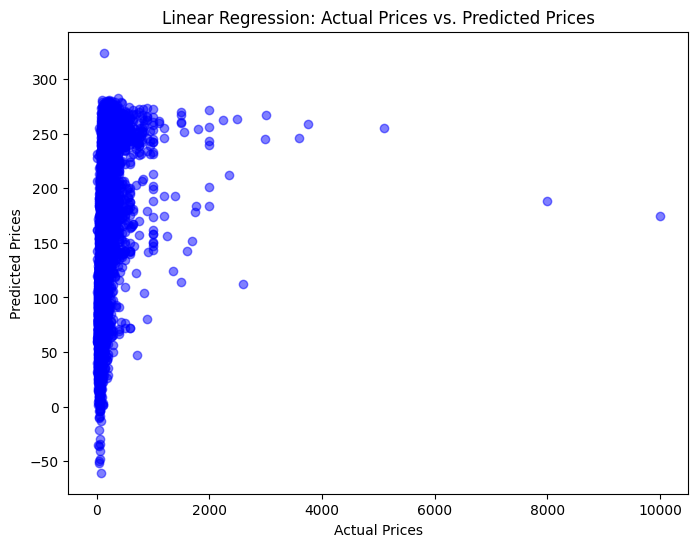

In [109]:
y_predict_lr = reg_lr.predict(X_test)
y_predict_lr

# Scatter plot of actual prices vs. predicted prices for Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predict_lr, color='blue', alpha=0.5)
plt.title("Linear Regression: Actual Prices vs. Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()

# Polynomial Regression

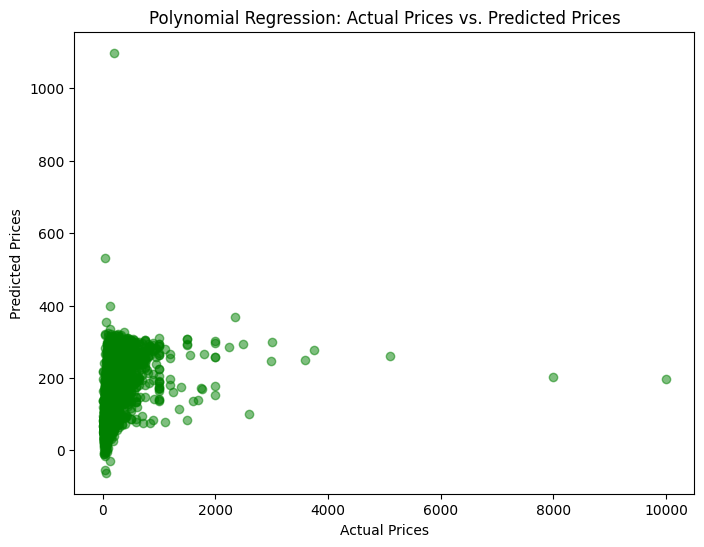

In [117]:
# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)
y_predict_poly = model_poly.predict(X_test_poly)
y_predict_poly

# Scatter plot of actual prices vs. predicted prices for Polynomial Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predict_poly, color='green', alpha=0.5)
plt.title("Polynomial Regression: Actual Prices vs. Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()

# Support Vector Regressor (SVR)

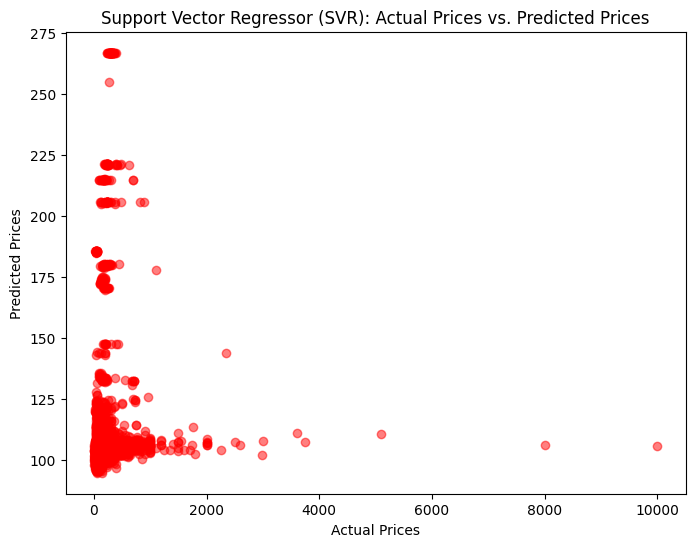

In [103]:
# Support Vector Regressor (SVR)
model_svr = SVR()
model_svr.fit(X_train, y_train)
y_predict_svr = model_svr.predict(X_test)
y_predict_svr

# Scatter plot of actual prices vs. predicted prices for Support Vector Regressor (SVR)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predict_svr, color='red', alpha=0.5)
plt.title("Support Vector Regressor (SVR): Actual Prices vs. Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")

# Random Forest Regressor

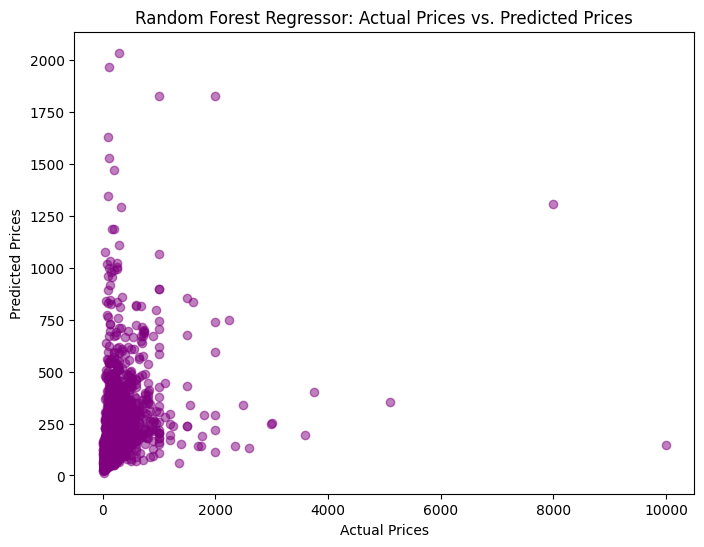

In [104]:
# Random Forest Regressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
y_pred_rf

# Scatter plot of actual prices vs. predicted prices for Random Forest Regressor
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='purple', alpha=0.5)
plt.title("Random Forest Regressor: Actual Prices vs. Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()

# Decision Tree Regressor

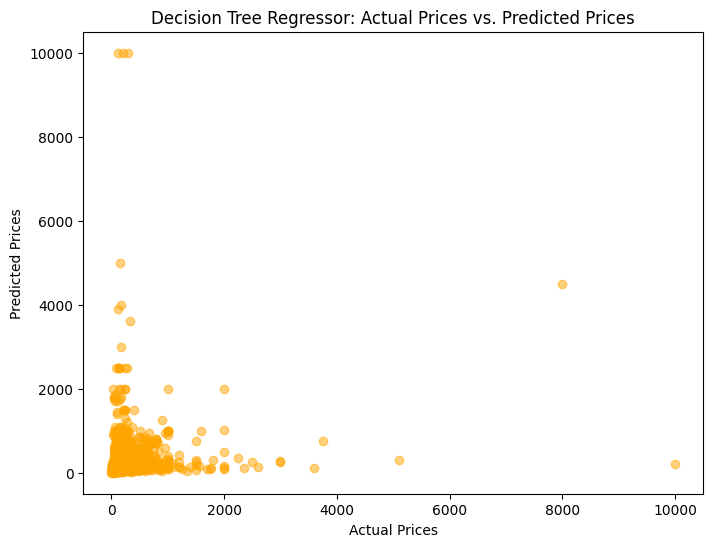

In [110]:
# Decision Tree Regressor
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
y_pred_dt

# Scatter plot of actual prices vs. predicted prices for Decision Tree Regressor
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt, color='orange', alpha=0.5)
plt.title("Decision Tree Regressor: Actual Prices vs. Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()